##Fellowship Challenge - Airline On-Time Arrivals

Use the US Dept. of Transportation on-time arrival data for non-stop domestic flights by major air carriers to predict arrival delays.

Objectives:
1) Build a binary classification model for predicting arrival delays
2) Build a regression model that predicts the extent of the delay

<i>NB: Do not use departure delay as an input feature.</i>

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [3]:
# import data
Delay_cause = pd.read_csv('Delay_cause.csv')
Flight_summary = pd.read_csv('Flight_summary.csv')
Origin_Dest = pd.read_csv('Origin_Dest.csv')
Delay_cause.shape, Flight_summary.shape, Origin_Dest.shape

((445827, 7), (445827, 8), (445827, 20))

In [4]:
# Create new variables
# TOTAL_DELAY = sum of delays
Flight_summary['TOTAL_DELAY'] = Delay_cause['CARRIER_DELAY'] + Delay_cause['WEATHER_DELAY'] + Delay_cause['NAS_DELAY'] + Delay_cause['SECURITY_DELAY'] + Delay_cause['LATE_AIRCRAFT_DELAY']
# Speed = Distance / Time

# OCC = Any Delay above 0 minutes
OCC = np.zeros(np.size(Flight_summary['TOTAL_DELAY']))
Delay = np.where(Flight_summary['TOTAL_DELAY'] >= 0)
OCC[Delay] = 1
Delay_cause['OCC'] = OCC

Flight_summary['SPEED'] = Flight_summary['DISTANCE']/Flight_summary['AIR_TIME']
# AET-AT: Difference between ACTUAL_ELAPSED_TIME and AIR_TIME
Flight_summary['AET-AT'] = Flight_summary['ACTUAL_ELAPSED_TIME'] - Flight_summary['AIR_TIME']
# CET-AT: Difference between CRS_ELAPSED_TIME and AIR_TIME
Flight_summary['CET-AT'] = Flight_summary['CRS_ELAPSED_TIME'] - Flight_summary['AIR_TIME']
# CET-AET: Difference between CRS_ELAPSED_TIME and ACTUAL_ELAPSED_TIME
Flight_summary['CET-AET'] = Flight_summary['CRS_ELAPSED_TIME'] - Flight_summary['ACTUAL_ELAPSED_TIME']
Delay_cause.shape, Flight_summary.shape

((445827, 8), (445827, 13))

In [5]:
Delay_cause.head(), Flight_summary.head(), Origin_Dest.head()

(  UNIQUE_CARRIER  CARRIER_DELAY  WEATHER_DELAY  NAS_DELAY  SECURITY_DELAY  \
 0             AA            NaN            NaN        NaN             NaN   
 1             AA            NaN            NaN        NaN             NaN   
 2             AA            NaN            NaN        NaN             NaN   
 3             AA            NaN            NaN        NaN             NaN   
 4             AA              0              0         47               0   
 
    LATE_AIRCRAFT_DELAY  Unnamed: 6  OCC  
 0                  NaN         NaN    0  
 1                  NaN         NaN    0  
 2                  NaN         NaN    0  
 3                  NaN         NaN    0  
 4                   66         NaN    1  ,
   UNIQUE_CARRIER  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME  AIR_TIME  FLIGHTS  \
 0             AA               158                  155       132        1   
 1             AA               158                  150       126        1   
 2             AA               15

In [6]:
# Feature_extraction, change categorical data into vector
# Carrier 
UC = Origin_Dest[['UNIQUE_CARRIER']]
UC_x = [dict(r.iteritems()) for _, r in UC.iterrows()]
#UC.to_dict().values()
vect = DictVectorizer(sparse=False)
UC_v = vect.fit_transform(UC_x)

#np.sum(UC_v,axis=0) # Check the number of flights by carrier

# Origin
OR = Origin_Dest[['ORIGIN']]
OR_x = [dict(r.iteritems()) for _, r in OR.iterrows()]
OR_v = vect.fit_transform(OR_x)

# DEST
DE = Origin_Dest[['DEST']]
DE_x = [dict(r.iteritems()) for _, r in DE.iterrows()]
DE_v = vect.fit_transform(DE_x)

UC_v.shape,OR_v.shape, DE_v.shape

((445827, 12), (445827, 294), (445827, 294))

In [7]:
# Put the categorical data back to a dataframe format
UNIQUE_CARRIER_x = pd.DataFrame(UC_v)
ORIGIN_x = pd.DataFrame(OR_v)
DEST_x = pd.DataFrame(DE_v)
#UNIQUE_CARRIER_x.head()
#ORIGIN_x.head()

In [14]:
# Prepare Predictors and Predictand (delay occurrence)
Por1 = Flight_summary[['AIR_TIME','DISTANCE','SPEED','CET-AT','AET-AT']]
Predictors = pd.concat([Por1, UNIQUE_CARRIER_x,ORIGIN_x,DEST_x], axis=1)
#Predictors.shape
# Prepare 
Predictand = Delay_cause[['OCC']]
# Split the data, 80% for training, 20% for testing
PredictorsTrain, PredictorsTest, PredictandTrain, PredictandTest = train_test_split(Predictors, Predictand, test_size = 0.2)
PredictorsTrain.shape, PredictorsTest.shape, PredictandTrain.shape, PredictandTest.shape

((356661, 605), (89166, 605), (356661, 1), (89166, 1))

In [9]:
# Create model to predict delay case
model1 = DecisionTreeClassifier()
model1.fit(PredictorsTrain, PredictandTrain)
Result1_Train = model1.predict(PredictorsTrain)
Result1_Test = model1.predict(PredictorsTest)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [10]:
# Performance Validation

In [40]:
Predictors_d.head()

,AIR_TIME,DISTANCE,SPEED,CET-AT,AET-AT,0,1,2,3,4,...,285,286,287,288,289,290,291,292,293,TD
4,137,986,7.197080,21,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,113
15,123,986,8.016260,35,22,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
22,147,986,6.707483,11,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
24,128,986,7.703125,30,29,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,63
26,149,986,6.617450,42,48,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,32


In [41]:
# Prepare Predictors and Predictand (delay time)
temp1 = Predictors
temp1['TD'] = Flight_summary['TOTAL_DELAY']
Predictors_d = temp1.dropna(subset = ['TD'])
del Predictors_d['TD']

temp2 = Flight_summary[['TOTAL_DELAY']]
Predictand_d = temp2.dropna(subset = ['TOTAL_DELAY'])
Predictors_d.shape, Predictand_d.shape
PredictorsTrain_d, PredictorsTest_d, PredictandTrain_d, PredictandTest_d = train_test_split(Predictors_d, Predictand_d, test_size = 0.2)
PredictorsTrain_d.shape, PredictorsTest_d.shape, PredictandTrain_d.shape, PredictandTest_d.shape

((56705, 605), (14177, 605), (56705, 1), (14177, 1))

In [42]:
# Create model to predict delay time
model2 = linear_model.LinearRegression()
model2.fit(PredictorsTrain_d,PredictandTrain_d)
Result2_Train = model2.predict(PredictorsTrain_d)
Result2_Test = model2.predict(PredictorsTest_d)

((0, 1000), (0, 1000))

/Users/calvincheung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


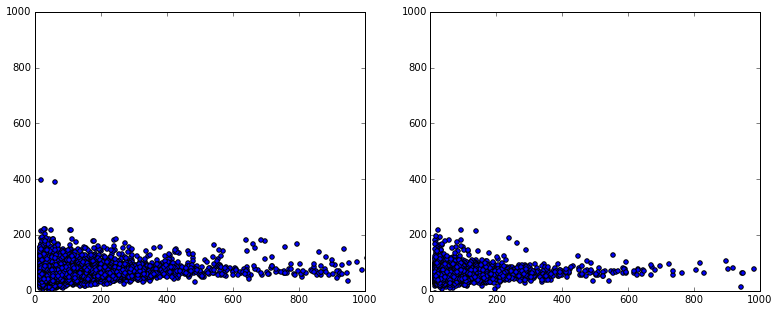

In [49]:
fig = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(PredictandTrain_d,Result2_Train)
plt.xlim(0,1000), plt.ylim(0,1000)
plt.subplot(1,2,2)
plt.scatter(PredictandTest_d,Result2_Test)
plt.xlim(0,1000), plt.ylim(0,1000)